# Momento de Retroalimentación: Módulo 2 Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución. (Portafolio Implementación)
## Facundo Vecchi A01283666
### Analisis de los datos

In [1]:
# Uso General
import pandas as pd
import matplotlib.pyplot as plt

# Metricas y utilidades
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
cols = ["Class", "Alcohol" , "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
data = pd.read_csv("wine.data", header=None, names=cols)
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Analisis Estadistico

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


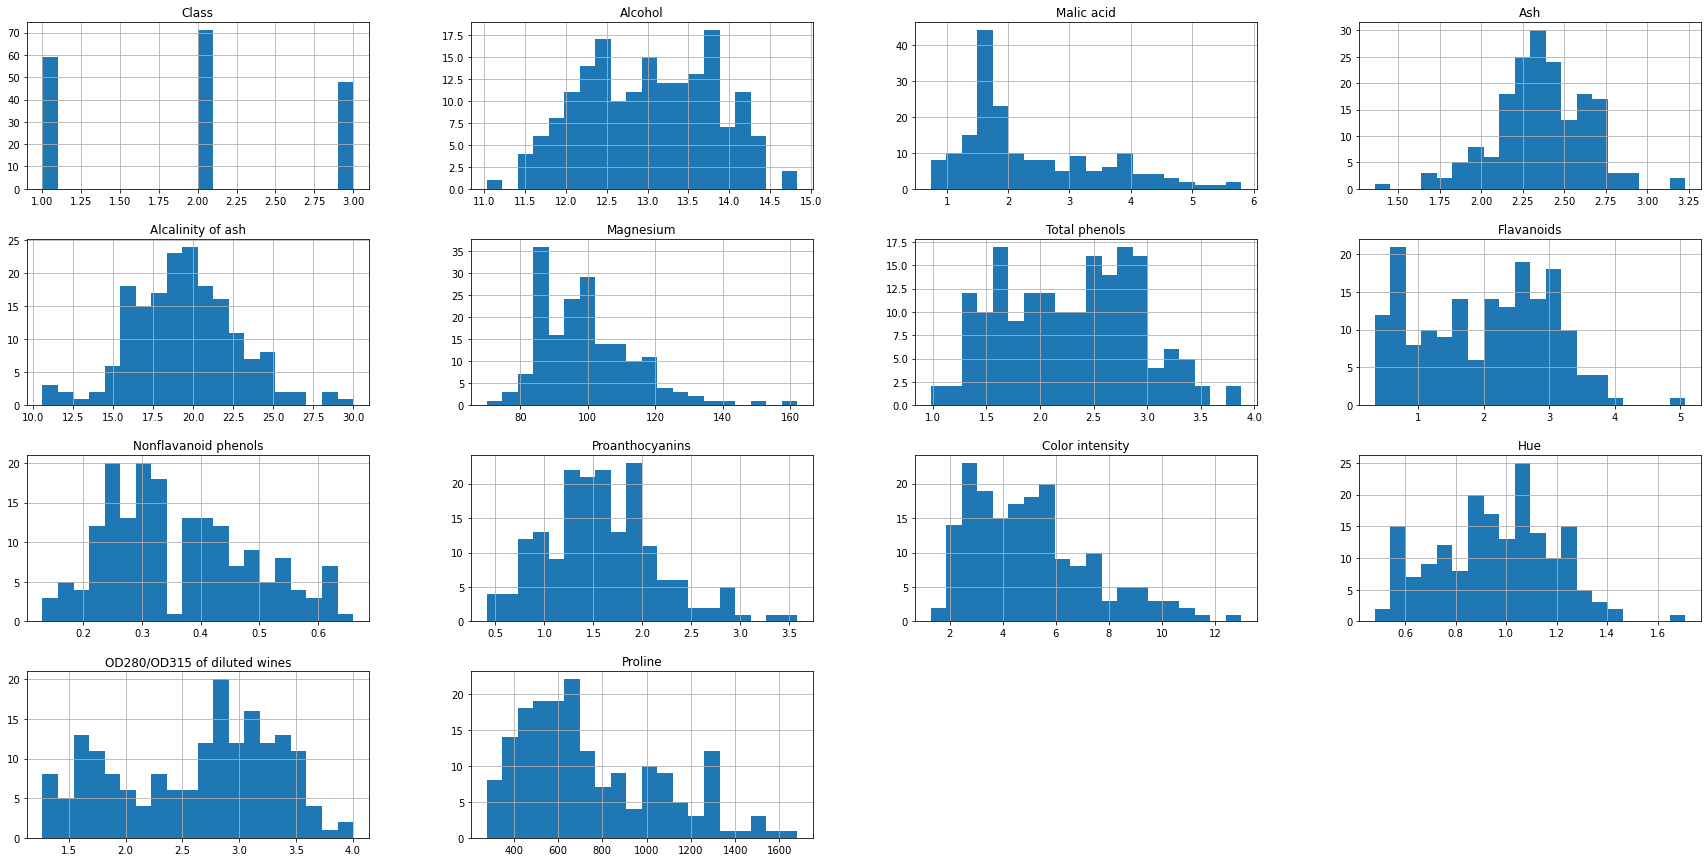

In [5]:
data.hist(bins=20, figsize=(30, 15))
plt.show()

#### Analizando variable Alcohol
Se puede observar en el histograma que Alcohol tiene una distribucion casi centrada

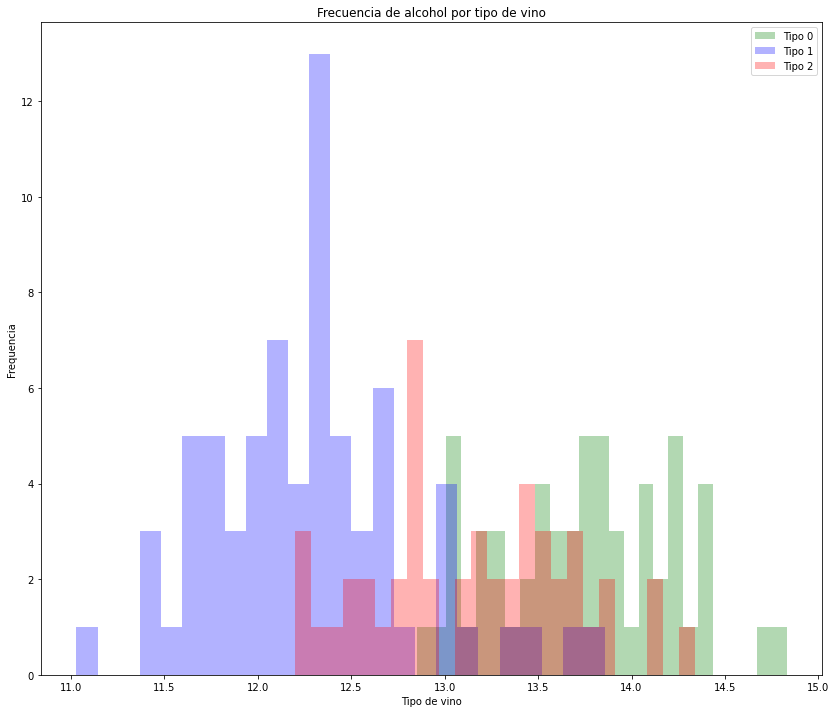

In [6]:
kwargs = dict(alpha=0.3,bins=25)

tipo1 = data.loc[data.Class == 1, 'Alcohol']
tipo2 = data.loc[data.Class == 2, 'Alcohol']
tipo3 = data.loc[data.Class == 3, 'Alcohol']

plt.hist(tipo1, **kwargs, color='g', label='Tipo 0')
plt.hist(tipo2, **kwargs, color='b', label='Tipo 1')
plt.hist(tipo3, **kwargs, color='r', label='Tipo 2')
plt.gca().set(title='Frecuencia de alcohol por tipo de vino', ylabel='Frequencia', xlabel='Tipo de vino')
plt.legend()

fig = plt.gcf()
fig.set_figheight(12)
fig.set_figwidth(14)

#### Se reduce la dimensionalidad de los datos para observer la division de los tipos de vino mas claramente

In [7]:
X = pd.DataFrame(StandardScaler().fit_transform(data.drop(columns="Class", axis=1)))
y = data.Class.values
print(X)
pca = PCA(n_components=2)

pca_results = pd.DataFrame(pca.fit_transform(X))
pca_results.columns = ["PC_1", "PC_2"]
pca_final = pd.concat([pca_results, data[['Class']]], axis = 1)

           0         1         2         3         4         5         6   \
0    1.518613 -0.562250  0.232053 -1.169593  1.913905  0.808997  1.034819   
1    0.246290 -0.499413 -0.827996 -2.490847  0.018145  0.568648  0.733629   
2    0.196879  0.021231  1.109334 -0.268738  0.088358  0.808997  1.215533   
3    1.691550 -0.346811  0.487926 -0.809251  0.930918  2.491446  1.466525   
4    0.295700  0.227694  1.840403  0.451946  1.281985  0.808997  0.663351   
..        ...       ...       ...       ...       ...       ...       ...   
173  0.876275  2.974543  0.305159  0.301803 -0.332922 -0.985614 -1.424900   
174  0.493343  1.412609  0.414820  1.052516  0.158572 -0.793334 -1.284344   
175  0.332758  1.744744 -0.389355  0.151661  1.422412 -1.129824 -1.344582   
176  0.209232  0.227694  0.012732  0.151661  1.422412 -1.033684 -1.354622   
177  1.395086  1.583165  1.365208  1.502943 -0.262708 -0.392751 -1.274305   

           7         8         9         10        11        12  
0   -0.65

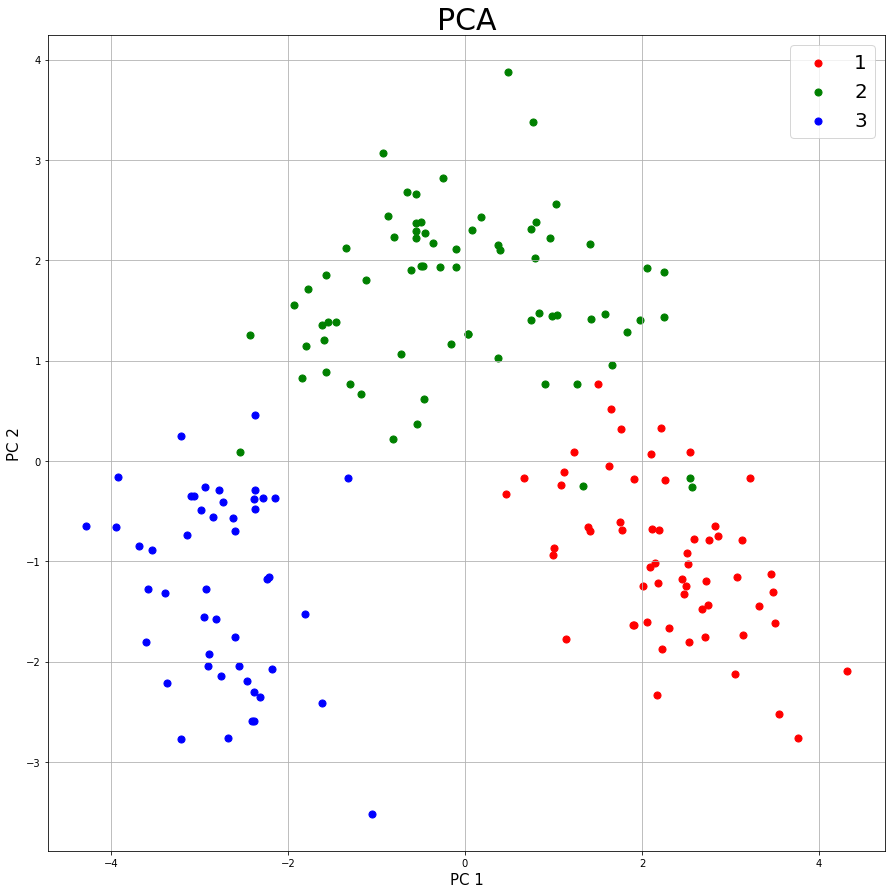

In [8]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('PCA', fontsize = 30)
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for t, c in zip(targets, colors):
    indices = pca_final['Class'] == t
    ax.scatter(
        pca_final.loc[indices, 'PC_1'],
        pca_final.loc[indices, 'PC_2'],
        c = c,
        s = 50
    )
ax.legend(targets, prop={'size': 20})
ax.grid()


Una vez se escalaron los datos y se aplico el PCA podemos observar como
la division entre los tipos de vino se vuelve mucho mas clara.